![image.png](attachment:image.png)

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
# Load no data set "penguins", Select nas variáveis quantitativas e eliminar valores faltantes
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

In [3]:
# Padronizando as variáveis para média zero e desvio padrão 1
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [4]:
# Realizando o agrupamento hierárquico
clus = AgglomerativeClustering(linkage="complete",
                                 distance_threshold = None,
                                 n_clusters=3)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [5]:
#Mapeando os grupos
peng_num["Grupo"] = clus.labels_
peng_merged = peng.merge(peng_num["Grupo"], how='left', on='id')
peng_merged["Grupo"] = peng_merged["Grupo"].map({0.0: "0", 1.0: "1", 2.0: "2"})
peng_merged

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0


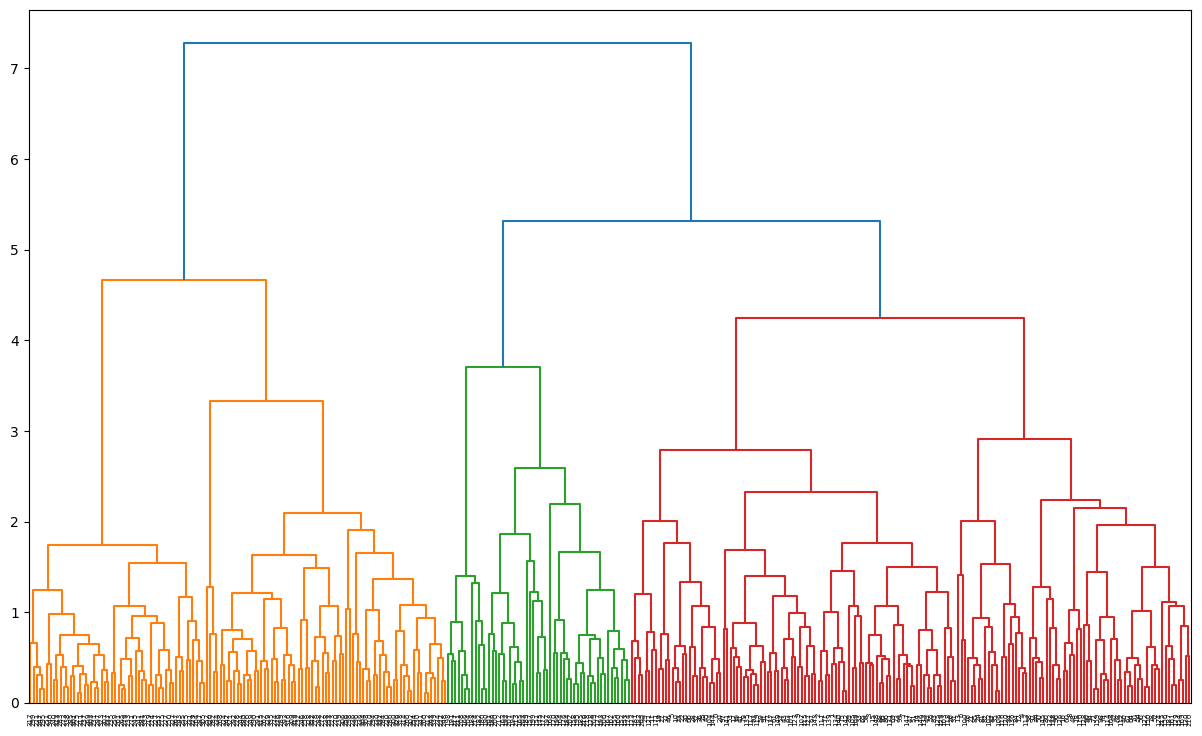

In [6]:
# Fazendo o Dendrograma
plt.figure(figsize=(15, 9))
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [7]:
pd.crosstab(peng_merged["Grupo"], peng_merged["species"])

species,Adelie,Chinstrap,Gentoo
Grupo,,,
0,0,0,123
1,151,14,0
2,0,54,0


In [8]:
quant = peng_merged.select_dtypes(include="number").columns
quant

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

<ipython-input-10-24f38d07258e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=peng_merged, y="Grupo", x=quant[i], ax=axes[i], palette="Set2")
<ipython-input-10-24f38d07258e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=peng_merged, y="Grupo", x=quant[i], ax=axes[i], palette="Set2")
<ipython-input-10-24f38d07258e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=peng_merged, y="Grupo", x=quant[i], ax=axes[i], palette="Set2")
<ipython-input-10-24f38d07258e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is 

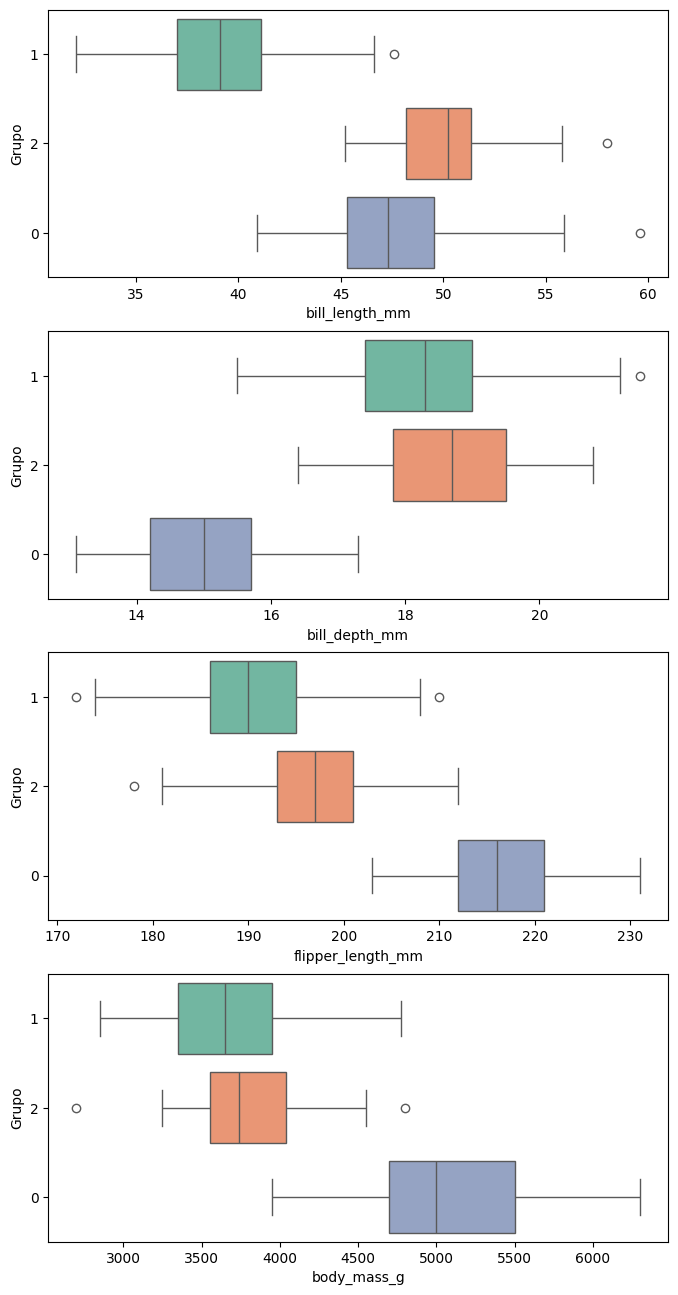

In [10]:
fig, axes = plt.subplots(nrows=4, figsize=(8, 16))
for i, q in enumerate(quant):
    sns.boxplot(data=peng_merged, y="Grupo", x=quant[i], ax=axes[i], palette="Set2")

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?


# Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

#### Ao utilizar 6 grupos, identificamos subgrupos bem definidos dentro das três espécies. No caso da espécie Adelie, os grupos 1 e 2 apresentam diferenças sutis entre si, assim como os grupos 4 e 5 para a espécie Chinstrap, e os grupos 0 e 3 para a espécie Gentoo. Essas divisões sugerem variações naturais entre as espécies, que podem refletir adaptações a diferentes ambientes e condições ecológicas. As características observadas, como comprimento e profundidade do bico, e o comprimento das nadadeiras, provavelmente estão relacionadas a essas adaptações.

In [12]:
# Realizando o agrupamento hierárquico = 6
clus = AgglomerativeClustering(linkage="complete",
                                 distance_threshold = None,
                                 n_clusters=6)
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [13]:
#Mapeando os grupos
peng_num["Grupo"] = clus.labels_
peng_merged = peng.merge(peng_num["Grupo"], how='left', on='id')
peng_merged["Grupo"] = peng_merged["Grupo"].map({0.0: "0", 1.0: "1", 2.0: "2", 3.0: "3", 4.0: "4", 5.0: "5"})
peng_merged

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,3
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0


In [19]:
# contagem de espécie em cada grupo
pd.crosstab(peng_merged["Grupo"], peng_merged["species"],margins=True, margins_name="Total" )

species,Adelie,Chinstrap,Gentoo,Total
Grupo,,,,
0,0,0,71,71
1,91,5,0,96
2,60,9,0,69
3,0,0,52,52
4,0,42,0,42
5,0,12,0,12
Total,151,68,123,342


In [20]:
#contagem machos e fêmeas há em cada grupo
pd.crosstab([peng_merged["Grupo"], peng_merged["sex"]], peng_merged["species"], margins=True, margins_name="Total")

species       Adelie  Chinstrap  Gentoo  Total
Grupo sex                                     
0     Female       0          0       9      9
      Male         0          0      61     61
1     Female      69          5       0     74
      Male        18          0       0     18
2     Female       4          9       0     13
      Male        55          0       0     55
3     Female       0          0      49     49
4     Female       0         20       0     20
      Male         0         22       0     22
5     Male         0         12       0     12
Total            146         68     119    333

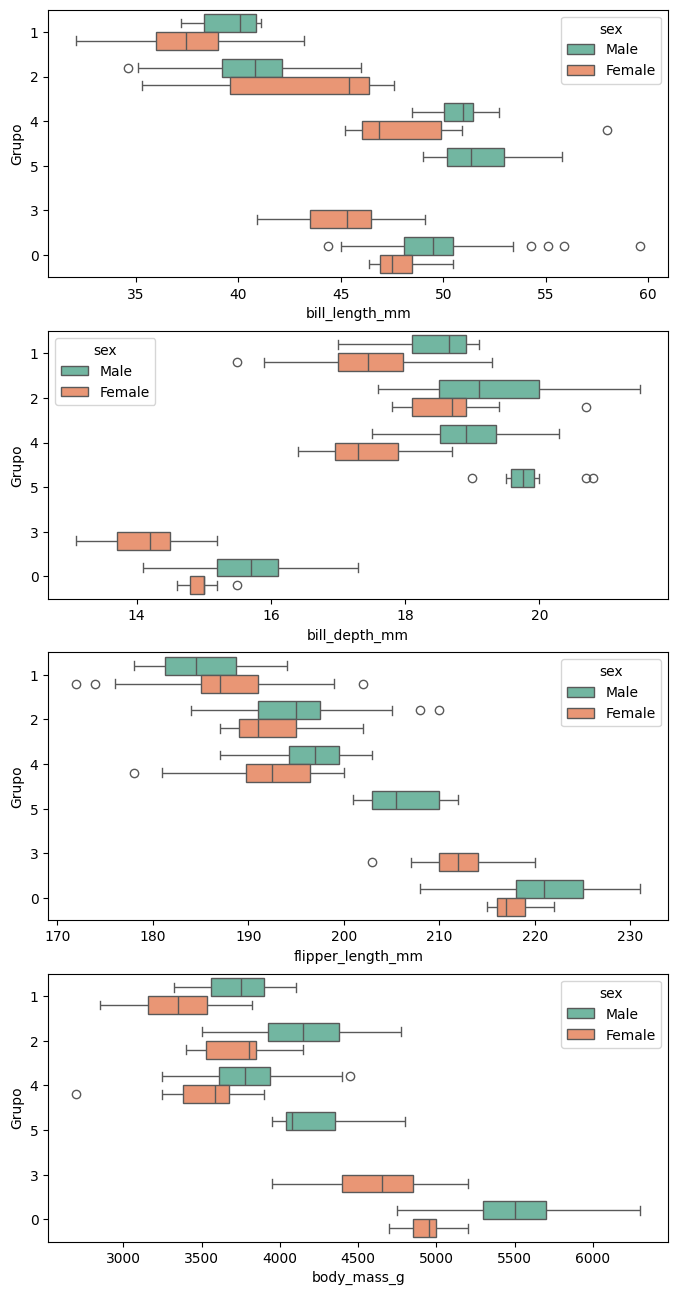

In [26]:
fig, axes = plt.subplots(nrows=4, figsize=(8, 16))
for i, q in enumerate(quant):
    sns.boxplot(data=peng_merged, y="Grupo", hue = "sex", x=quant[i], ax=axes[i],palette="Set2")

<ipython-input-25-07798a19cc88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=peng_merged, y="Grupo", x=quant[i], ax=axes[i],palette="Set2")
<ipython-input-25-07798a19cc88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=peng_merged, y="Grupo", x=quant[i], ax=axes[i],palette="Set2")
<ipython-input-25-07798a19cc88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=peng_merged, y="Grupo", x=quant[i], ax=axes[i],palette="Set2")
<ipython-input-25-07798a19cc88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is dep

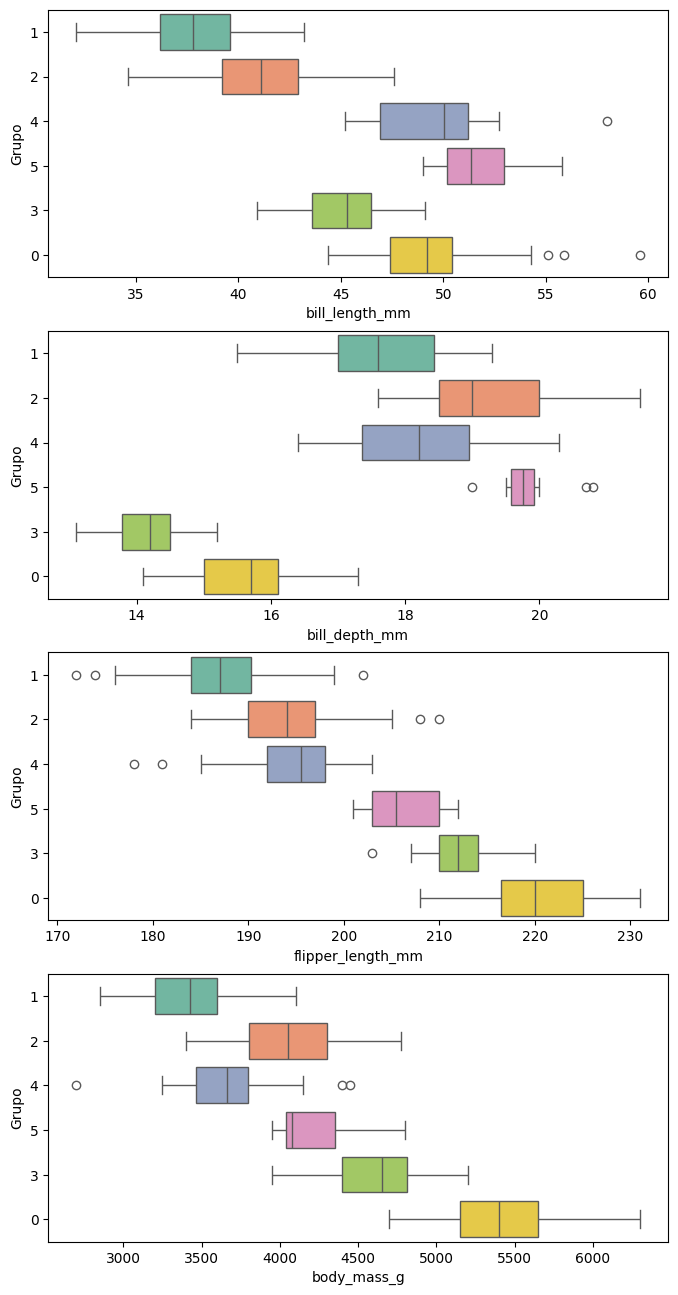

In [25]:
fig, axes = plt.subplots(nrows=4, figsize=(8, 16))
for i, q in enumerate(quant):
    sns.boxplot(data=peng_merged, y="Grupo", x=quant[i], ax=axes[i],palette="Set2")